### Perceptron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from common_functions import *

### Data loading

In [2]:
# read the dataset
df = pd.read_csv('dataset.csv')

# visualize the data
df.head()

,Body_Level,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,...,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,BMI
0,3,1,0.646666,0.690578,1.016135,1,-0.199318,0.236558,0,0.402155,...,0,0,1,0,1,0,0,0,0,0.823278
1,3,1,-0.649582,-0.003364,0.686578,1,0.428856,-1.026715,0,-1.792121,...,0,0,1,0,0,0,0,1,0,0.806112
2,3,0,-0.537725,0.493657,1.790354,1,1.069487,1.401741,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.751663
3,3,0,-1.291128,-0.545353,-0.036499,1,0.986227,-1.620907,0,0.402155,...,0,0,1,0,0,0,0,1,0,0.219426
4,3,0,0.270463,-0.818715,0.951256,1,1.069487,0.974150,0,0.402155,...,0,0,1,0,0,0,0,1,0,1.574457


In [3]:
# data splitting
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Body_Level', axis=1), df['Body_Level'], test_size=0.2, random_state=42)
# Print the shapes of the training and test sets
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (1181, 27)
Test set shape: (296, 27)


### Without bmi feature

In [4]:
# drop the bmi feature
x_no_bmi_train = X_train.drop('BMI', axis=1)
x_no_bmi_train

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Smoking,Meal_Count,Fam_Hist,...,Alcohol_Consump_no,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
660,0,2.894485,-1.375850,-0.176003,1,0.185505,-0.213591,0,-1.714296,1,...,1,0,0,1,0,1,0,0,0,0
933,0,-0.520559,-0.756721,-1.352993,1,-0.780555,-1.620907,0,-2.127945,0,...,1,0,0,1,0,0,0,0,1,0
254,0,1.101919,-0.090067,-0.556348,1,0.358678,-0.376294,0,0.402155,1,...,0,0,0,1,0,1,0,0,0,0
1117,1,2.643528,0.511486,1.114023,1,-0.780555,-1.390872,0,0.024564,1,...,1,0,0,1,0,1,0,0,0,0
812,1,-0.275467,-0.765239,-0.629718,1,-0.780555,1.287202,0,-2.127945,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,1.627336,0.334466,0.651969,1,0.146730,-1.620907,0,-0.800193,1,...,1,0,0,1,0,1,0,0,0,0
1294,0,-0.398926,0.335871,1.864626,1,1.069487,-0.837585,0,0.402155,1,...,0,0,0,1,0,0,0,0,1,0
860,1,0.275591,1.298113,0.707655,1,1.069487,0.170120,0,0.402155,1,...,0,0,0,1,0,0,0,0,1,0
1459,0,0.270463,-0.974747,0.718137,1,1.069487,0.973931,0,0.402155,1,...,0,0,0,1,0,0,0,0,1,0


In [5]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(x_no_bmi_train, Y_train)

In [6]:
apply_crossvalidation(perceptron_model, x_no_bmi_train, Y_train)
Evaluate(trained_perceptron_model, X_test.drop('BMI', axis=1), Y_test)

Accuracy: 0.7942102264634666 +/- 0.052622328453952746
F1-score: 0.785008008790076 +/- 0.051750748165516273
Accuracy: 0.6790540540540541
Precision: 0.7531418492355992
Recall: 0.6790540540540541
F1 score: 0.6197850222740702
Confusion matrix:
 [[ 25  16   0   0]
 [  0  40   3   0]
 [  0  43   9  33]
 [  0   0   0 127]]


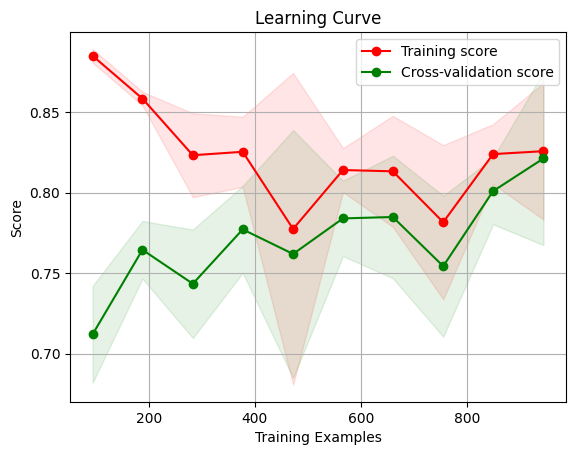

Mean Squared Error: 0.2776858108108108
Bias: 0.09898589527027027
Variance: 0.17869991554054054


In [7]:
# draw insights
draw_learning_curve(perceptron_model, x_no_bmi_train, Y_train)
draw_bias_variance_decomp(perceptron_model, x_no_bmi_train, Y_train, X_test.drop('BMI', axis=1), Y_test)

### Using BMI

In [8]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(X_train, Y_train)

In [9]:
apply_crossvalidation(perceptron_model, X_train, Y_train)
Evaluate(trained_perceptron_model, X_test, Y_test)

Accuracy: 0.8154322746047571 +/- 0.035176656811024096
F1-score: 0.8078091263397601 +/- 0.03719152001051629
Accuracy: 0.7331081081081081
Precision: 0.8024498731619109
Recall: 0.7331081081081081
F1 score: 0.7313983008443043
Confusion matrix:
 [[ 26  12   3   0]
 [  1  35   7   0]
 [  0  44  31  10]
 [  0   2   0 125]]


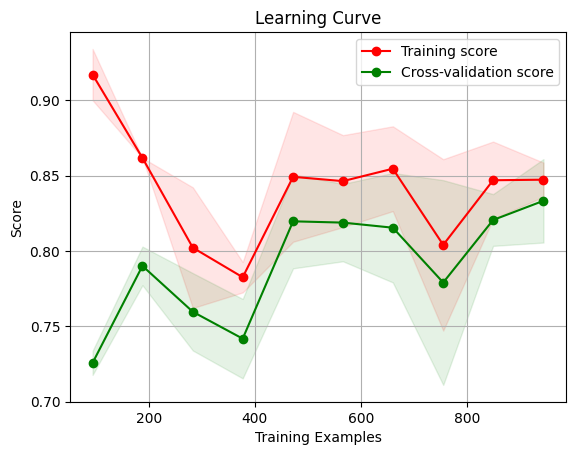

Mean Squared Error: 0.2584966216216216
Bias: 0.09381173986486487
Variance: 0.16468488175675675


In [10]:
# draw insights
draw_learning_curve(perceptron_model, X_train, Y_train)
draw_bias_variance_decomp(perceptron_model, X_train, Y_train, X_test, Y_test)

### BMI, Height


In [11]:
X_train['BMI']
Y_train.value_counts()

3    553
2    321
1    158
0    149
Name: Body_Level, dtype: int64

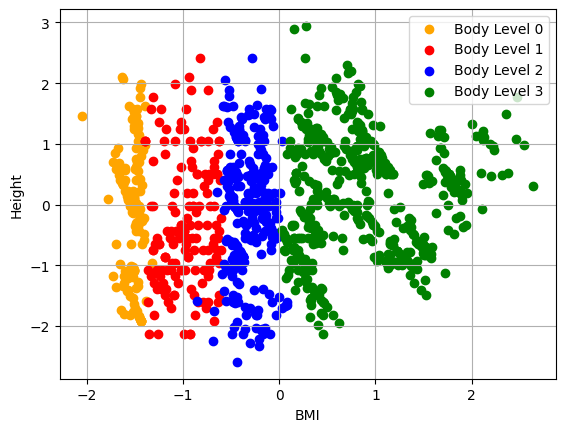

In [12]:
# categories of the points as integers (1-5)
categories = [0, 1, 2, 3]

# define the colors for each category
colors = {
    0: 'orange',
    1: 'red',
    2: 'blue',
    3: 'green'
}

classes = [
    X_train.loc[Y_train == 0],
    X_train.loc[Y_train == 1],
    X_train.loc[Y_train == 2],
    X_train.loc[Y_train == 3]
]

# create a scatter plot with different colors for each category
plt.scatter(classes[0]['BMI'], classes[0]['Height'], color=colors[0], label='Body Level 0')
plt.scatter(classes[1]['BMI'], classes[1]['Height'], color=colors[1], label='Body Level 1')
plt.scatter(classes[2]['BMI'], classes[2]['Height'], color=colors[2], label='Body Level 2')
plt.scatter(classes[3]['BMI'], classes[3]['Height'], color=colors[3], label='Body Level 3')


# add gridlines and labels to the plot
plt.grid(True)
plt.xlabel('BMI')
plt.ylabel('Height')
plt.legend()

# show the plot
plt.show()

In [13]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(X_train[['BMI', 'Height']], Y_train)

In [14]:
apply_crossvalidation(perceptron_model, X_train[['BMI', 'Height']], Y_train)
Evaluate(trained_perceptron_model, X_test[['BMI', 'Height']], Y_test)

Accuracy: 0.7637302378578551 +/- 0.07341691855495999
F1-score: 0.7340592318853683 +/- 0.09394551816822853
Accuracy: 0.7837837837837838
Precision: 0.7754324492588278
Recall: 0.7837837837837838
F1 score: 0.7665928180911984
Confusion matrix:
 [[ 33   0   8   0]
 [  2   6  35   0]
 [  0  12  72   1]
 [  0   0   6 121]]


In [15]:
# print the model coefficent
trained_perceptron_model.coef_

array([[-15.56370666,   0.39176811],
       [ -0.98328239,   0.64045086],
       [ -0.97950239,  -1.19640575],
       [ 13.52902788,   0.68020611]])

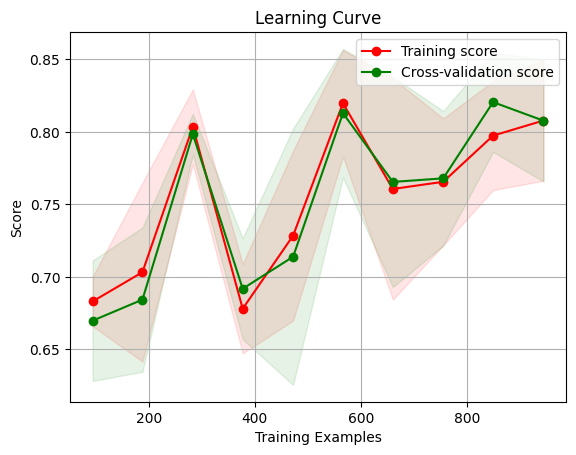

Mean Squared Error: 0.2623817567567568
Bias: 0.088821875
Variance: 0.17355988175675677


In [16]:
# draw insights
draw_learning_curve(perceptron_model, X_train[['BMI', 'Height']], Y_train)
draw_bias_variance_decomp(perceptron_model, X_train[['BMI', 'Height']], Y_train, X_test[['BMI', 'Height']], Y_test)

### BMI & Height ^ 2

In [17]:
# transform the equation into 2nd polynomial
x_train = X_train.copy()
x_train['Height'] = x_train['Height'] ** 2

x_test = X_test.copy()
x_test['Height'] = x_test['Height'] ** 2

In [18]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(x_train[['BMI', 'Height']], Y_train)

In [19]:
apply_crossvalidation(perceptron_model, x_train[['BMI', 'Height']], Y_train)
Evaluate(trained_perceptron_model, x_test[['BMI', 'Height']], Y_test)

Accuracy: 0.8205027773821392 +/- 0.033785598884053684
F1-score: 0.7807303553177565 +/- 0.04260459656907801
Accuracy: 0.847972972972973
Precision: 0.7428387538404544
Recall: 0.847972972972973
F1 score: 0.7876575550404983
Confusion matrix:
 [[ 41   0   0   0]
 [  5   0  38   0]
 [  0   0  83   2]
 [  0   0   0 127]]


c:\Users\omara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


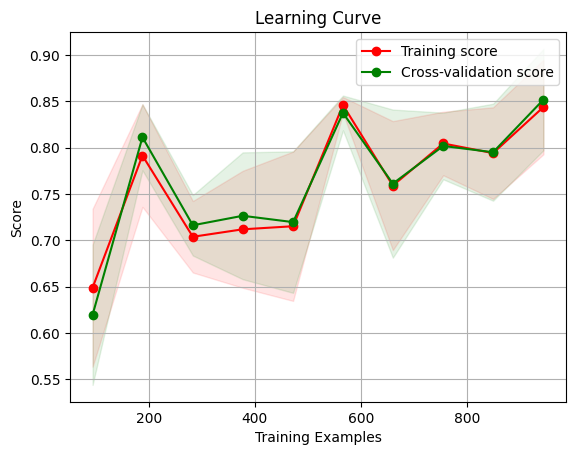

Mean Squared Error: 0.2824831081081081
Bias: 0.090653125
Variance: 0.1918299831081081


In [20]:
# draw insights
draw_learning_curve(perceptron_model, x_train[['BMI', 'Height']], Y_train)
draw_bias_variance_decomp(perceptron_model, x_train[['BMI', 'Height']], Y_train, x_test[['BMI', 'Height']], Y_test)

### Bmi and weight

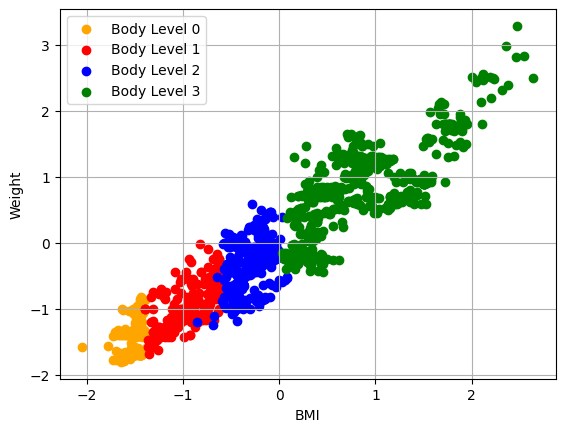

In [21]:
# categories of the points as integers (1-5)
categories = [0, 1, 2, 3]

# define the colors for each category
colors = {
    0: 'orange',
    1: 'red',
    2: 'blue',
    3: 'green'
}

classes = [
    X_train.loc[Y_train == 0],
    X_train.loc[Y_train == 1],
    X_train.loc[Y_train == 2],
    X_train.loc[Y_train == 3]
]

# create a scatter plot with different colors for each category
plt.scatter(classes[0]['BMI'], classes[0]['Weight'], color=colors[0], label='Body Level 0')
plt.scatter(classes[1]['BMI'], classes[1]['Weight'], color=colors[1], label='Body Level 1')
plt.scatter(classes[2]['BMI'], classes[2]['Weight'], color=colors[2], label='Body Level 2')
plt.scatter(classes[3]['BMI'], classes[3]['Weight'], color=colors[3], label='Body Level 3')


# add gridlines and labels to the plot
plt.grid(True)
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend()

# show the plot
plt.show()

In [22]:
# x_train = X_train
# x_train['Weight'] = x_train['Weight'] ** 2

In [23]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(X_train[['BMI', 'Weight']], Y_train)

In [24]:
apply_crossvalidation(perceptron_model, X_train[['BMI', 'Weight']], Y_train)
Evaluate(trained_perceptron_model, X_test[['BMI', 'Weight']], Y_test)

Accuracy: 0.7892536675687224 +/- 0.08955126836347609
F1-score: 0.7425100583925369 +/- 0.1209543865869612
Accuracy: 0.8851351351351351
Precision: 0.9233666862228933
Recall: 0.8851351351351351
F1 score: 0.8868549514622704
Confusion matrix:
 [[ 40   1   0   0]
 [  1  41   1   0]
 [  0  29  54   2]
 [  0   0   0 127]]


In [25]:
# print the model coefficent
trained_perceptron_model.coef_

array([[-18.00498041,  -0.91262152],
       [ -1.04884939,  -0.29225461],
       [  0.22627914,   0.95985847],
       [  6.4144445 ,   0.9219602 ]])

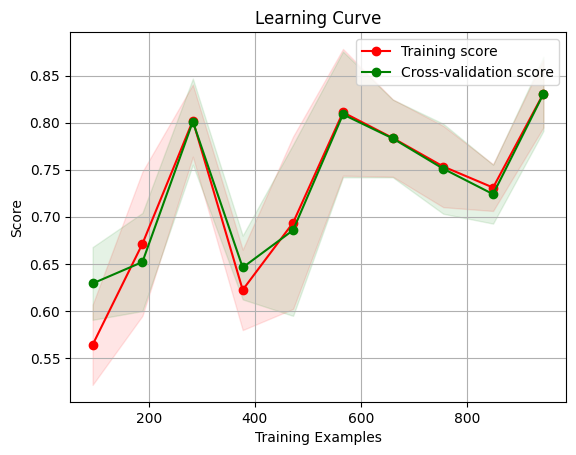

Mean Squared Error: 0.3225
Bias: 0.11232820945945945
Variance: 0.2101717905405405


In [26]:
# draw insights
draw_learning_curve(perceptron_model, X_train[['BMI', 'Weight']], Y_train)
draw_bias_variance_decomp(perceptron_model, X_train[['BMI', 'Weight']], Y_train, X_test[['BMI', 'Weight']], Y_test)

### BMI & Weight ^ 2

In [27]:
# transform the equation into 2nd polynomial
x_train = X_train.copy()
x_train['Weight'] = x_train['Weight'] ** 2

x_test = X_test.copy()
x_test['Weight'] = x_test['Weight'] ** 2

In [28]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(x_train[['BMI', 'Weight']], Y_train)

In [29]:
apply_crossvalidation(perceptron_model, x_train[['BMI', 'Weight']], Y_train)
Evaluate(trained_perceptron_model, x_test[['BMI', 'Weight']], Y_test)

Accuracy: 0.8349309215211509 +/- 0.09435757119584408
F1-score: 0.8027426855774387 +/- 0.1106295325917473
Accuracy: 0.8141891891891891
Precision: 0.7260300885300885
Recall: 0.8141891891891891
F1 score: 0.7574551520082811
Confusion matrix:
 [[ 41   0   0   0]
 [ 14   0  29   0]
 [  0   0  85   0]
 [  0   0  12 115]]


c:\Users\omara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


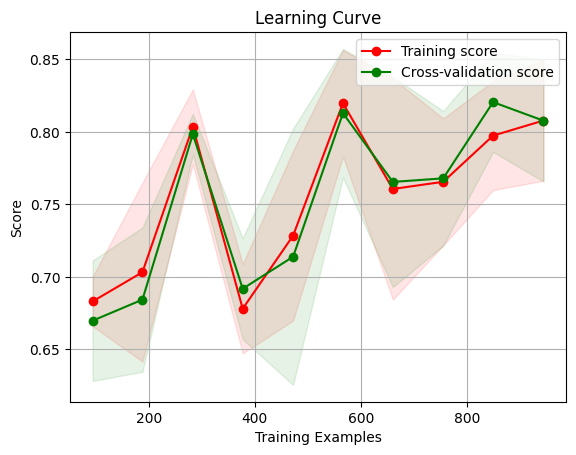

Mean Squared Error: 0.2623817567567568
Bias: 0.088821875
Variance: 0.17355988175675677


In [30]:
# draw insights
draw_learning_curve(perceptron_model, x_train[['BMI', 'Height']], Y_train)
draw_bias_variance_decomp(perceptron_model, x_train[['BMI', 'Height']], Y_train, x_test[['BMI', 'Height']], Y_test)

### Using Only BMI

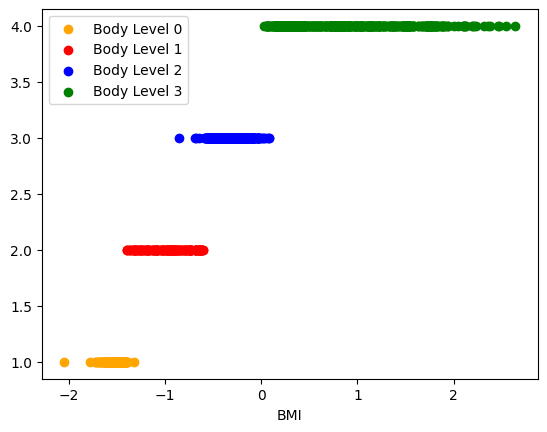

In [31]:
# plot bmi

# Plot the data
colors = {
    0: 'orange',
    1: 'red',
    2: 'blue',
    3: 'green'
}

classes = [
    X_train.loc[Y_train == 0],
    X_train.loc[Y_train == 1],
    X_train.loc[Y_train == 2],
    X_train.loc[Y_train == 3]
]

# create a scatter plot with different colors for each category
plt.scatter(classes[0]['BMI'], np.zeros_like(classes[0]['BMI']) + 1, color=colors[0], label='Body Level 0')
plt.scatter(classes[1]['BMI'], np.zeros_like(classes[1]['BMI']) + 2, color=colors[1], label='Body Level 1')
plt.scatter(classes[2]['BMI'], np.zeros_like(classes[2]['BMI']) + 3, color=colors[2], label='Body Level 2')
plt.scatter(classes[3]['BMI'], np.zeros_like(classes[3]['BMI']) + 4, color=colors[3], label='Body Level 3')

# Add axis labels and a title
plt.xlabel('BMI')
plt.legend()


# Display the plot
plt.show()

In [32]:
# make the date as one straight line
x_train = X_train
x_train = x_train.assign(Zero = np.zeros_like(x_train['BMI']))

x_test = X_test
x_test = x_test.assign(Zero = np.zeros_like(x_test['BMI']))


In [33]:
# train perceptron model
perceptron_model = Perceptron()
trained_perceptron_model = perceptron_model.fit(x_train[['BMI', 'Zero']], Y_train)

In [34]:
# print the model coefficent
trained_perceptron_model.coef_

array([[-12.83388863,   0.        ],
       [ -1.95598539,   0.        ],
       [  1.15703664,   0.        ],
       [  5.72600381,   0.        ]])

In [35]:
# Evaluation
apply_crossvalidation(perceptron_model, x_train[['BMI', 'Zero']], Y_train)
Evaluate(trained_perceptron_model, x_test[['BMI', 'Zero']], Y_test)

Accuracy: 0.769633955277026 +/- 0.1172449461849973
F1-score: 0.7109598348703429 +/- 0.1492399491894236
Accuracy: 0.5945945945945946
Precision: 0.7640803577624632
Recall: 0.5945945945945946
F1 score: 0.5958755246645633
Confusion matrix:
 [[ 5 36  0  0]
 [ 0 43  0  0]
 [ 0 43 42  0]
 [ 0  0 41 86]]


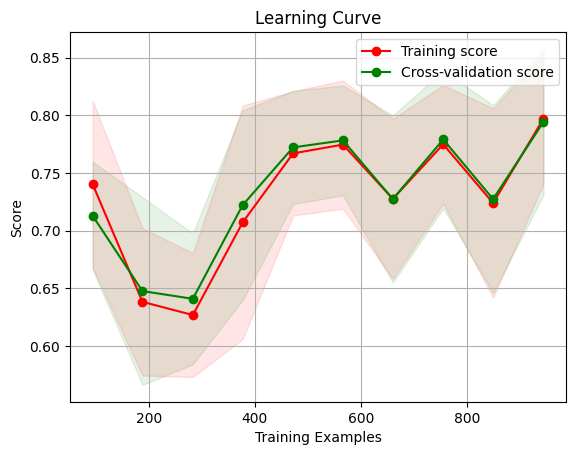

Mean Squared Error: 0.30486486486486486
Bias: 0.09780405405405404
Variance: 0.20706081081081082


In [36]:
# draw insights
draw_learning_curve(perceptron_model, x_train[['BMI', 'Zero']], Y_train)
draw_bias_variance_decomp(perceptron_model, x_train[['BMI', 'Zero']], Y_train, x_test[['BMI', 'Zero']], Y_test)